In [2]:
import matplotlib.pyplot as plt
import numpy as np
import codemodule as cm
from scipy.integrate import trapz 

In [8]:
plt.rcParams['figure.figsize'] = [17, 5]

In [4]:
r_c = 4.5
L = '046.78'
frames = cm.read_lammpstrj(f'./coms/MIXTURE_N1-256_N2-256_MPR1-50_MPR2-50_Bend1-00.0_Bend2-30.0_L-{L}-com.lammpstrj',0.2)
adj_mat = cm.dyn_graph_ser(frames,r_c)

6001 frames with 0.2 discard and 1 stride gives back 4801 frames


In [13]:
part_inds=[100,450]
binsies = np.arange(-20,21)
lags = [1,5,10,20]
bounds = [(2,200)]
res_tot= np.zeros((len(lags),len(binsies[:-1]),len(part_inds),len(bounds)))

In [14]:
for partind,k in enumerate(part_inds):
    times,res,comps = cm.part_clustser(adj_mat,k)
    N = len(comps)
    print(partind)
    for lind,lag in enumerate(lags):
        for bind,bound in enumerate(bounds):
            to_hist = []
            norm = 0
            for i in range(0,N-lag,lag):
            #ind = np.random.randint(0,N-lag)
            #if not np.any(np.array(sampled_inds) == ind):
                clust0 = comps[i]
                clust1 = comps[i+lag]
            #if len(clust0)>1:
                if len(clust0)>=bound[0] and len(clust0)<=bound[1]:
                    to_hist.append(len(clust1)-len(clust0))
            hist,bins_ = np.histogram(to_hist,bins=binsies,density=True)
        
            res_tot[lind,:,partind,bind] = hist 
#plt.ylabel('occurences')
#plt.xticks(binsies)
#plt.plot(lags,0.57*,color = 'black')
#plt.title('ring_ind = 450 (semiflexible)')
#plt.legend() 
#plt.show()

0
1


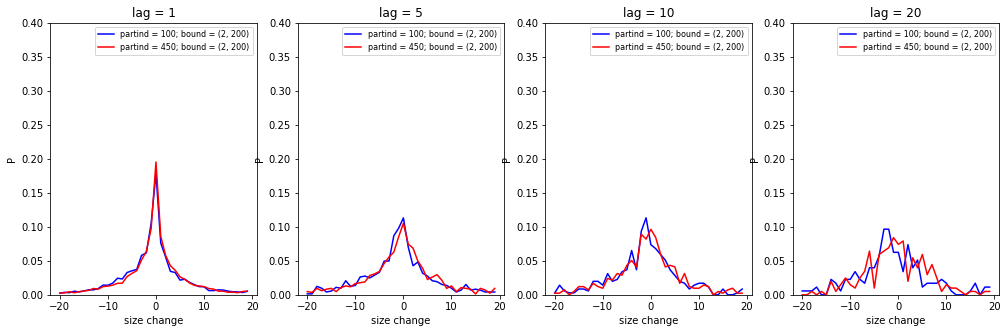

In [20]:
colors = {part_inds[0]:'blue',part_inds[1]:'red'}
#linestyles = {bounds[0]:'solid',bounds[1]:'dashed'}
linestyles = {bounds[0]:'solid'}
fig,axs = plt.subplots(1,len(lags))
for lind,l in enumerate(lags):
    for partind,part in enumerate(part_inds):
        for bind,bound in enumerate(bounds):
            axs[lind].plot(binsies[:-1],res_tot[lind,:,partind,bind],label = f'partind = {part}; bound = {bound}',color = colors[part],linestyle = linestyles[bound],linewidth = 1.5)
            axs[lind].set_title(f'lag = {l}')
            axs[lind].legend(fontsize = 8)
            axs[lind].set_xlabel('size change')
            axs[lind].set_ylabel('P')
            axs[lind].set_ylim(0.0,0.4)
plt.show()
#fig.savefig(f'./meeting_7.9/change_dist_L{L}.pdf')


In [21]:
res_P = np.zeros((len(part_inds),3,len(lags),len(bounds)))
dx = binsies[1]-binsies[0]
for lind,lag in enumerate(lags):
    for partind,part in enumerate(part_inds):
        for bind,bound in enumerate(bounds):
            res_P[partind,0,lind,bind] = np.sum(res_tot[lind,:,partind,bind][binsies[:-1]<0]*dx)
            res_P[partind,1,lind,bind] = np.sum(res_tot[lind,:,partind,bind][binsies[:-1]==0]*dx)
            res_P[partind,2,lind,bind] = np.sum(res_tot[lind,:,partind,bind][binsies[:-1]>0]*dx)

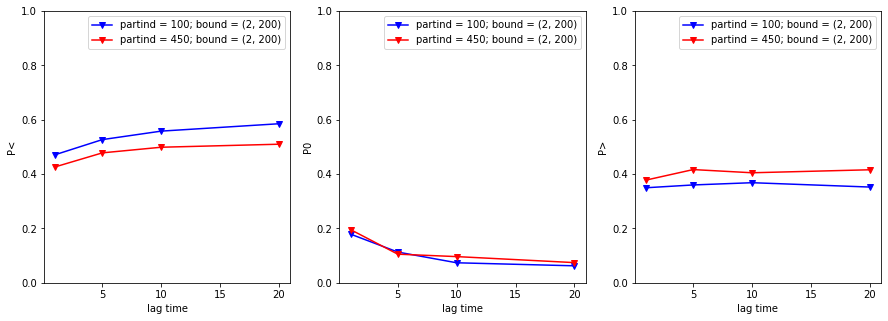

In [22]:
fig,axs = plt.subplots(1,3, figsize = (15,5))
colors = {part_inds[0]:'blue',part_inds[1]:'red'}
#linestyles = {bounds[0]:'solid',bounds[1]:'dashed'}
linestyles = {bounds[0]:'solid'}
y_labels = ['P<','P0','P>']
for i in range(3):
    for partind,part in enumerate(part_inds):
        for bind,bound in enumerate(bounds):
            axs[i].plot(lags,res_P[partind,i,:,bind],marker = 'v',label = f'partind = {part}; bound = {bound}',color = colors[part],linestyle = linestyles[bound])
        #axs[iprint(lind)].plot(lags,np.mean(res_P[:,i,:],axis = 0))
            axs[i].legend()
            axs[i].set_ylabel(y_labels[i])
            axs[i].set_xlabel('lag time')
            axs[i].set_ylim(0.0,1.0)
plt.show()
#fig.savefig(f'./meeting_7.9/change_distP_L{L}.pdf')